# Úkoly 
1. vykreslete grafy prvních 5 Legendrových polynomů na intervalu [-1,1]

In [1]:
import scipy as sp
import scipy.special as sps
import numpy as np
from matplotlib import pyplot as plt
from scipy.sparse import csr_matrix


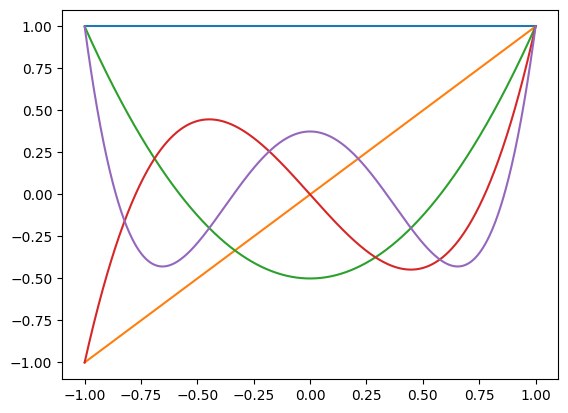

In [2]:
arr = np.linspace(-1,1,1000)
leg0 = sps.legendre(0)
leg1 = sps.legendre(1)
leg2 = sps.legendre(2)
leg3 = sps.legendre(3)
leg4 = sps.legendre(4)

plt.plot(arr,leg0(arr))
plt.plot(arr,leg1(arr))
plt.plot(arr,leg2(arr))
plt.plot(arr,leg3(arr))
plt.plot(arr,leg4(arr))
#uvedomuju si pofidernost kodu

2. Vyrobte sparse matici o rozměrech $n^2\times n^2$. Tato matice reprezentuje pravidelnou čtvercovou síť o velikosti $n \times n$. Každá buňka této čtvercové sítě odpovídá jednomu řádku/sloupci matice, přičemž pořadí buněk čtvrtcové sítě berte po řádcích (viz obrázek níže). Hodnoty v matici budou řízeny jedním parametrem $\varepsilon$, pro jednoduchost si místo něj představte $0.1$.
Nenulové hodnoty v matici jsou zadány sousedností buněk a to následovně:
    - hodnoty na diagonále (tedy sousednost prvku se sebou samým) jsou $1 + k \cdot \varepsilon$ (kde $k$ určuje počet sousedních buněk = 4 uvnitř, 3 na hranách, 2 v rozích)
    - mimodiagonální prvky mají hodnotu $-\varepsilon$, právě tehdy pokud index řádku a index sloupce mimodiagonálního prvku odpovídá sousedním buňkám ve čtvercové síti viz obrázek.

Ukázka jak přechází mřížka do matice pro $n=4$ a $\varepsilon = 0.1$ na následujícím obrázku:
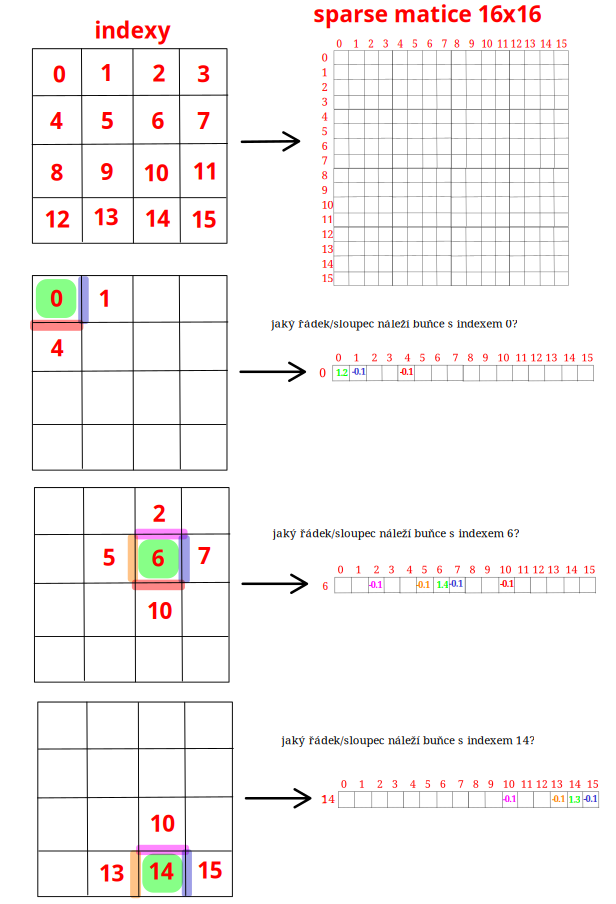


Sestavte matici pomocí formátu LIL a vyplňte hodnoty pomocí cyklu přes všechny buňky čtvercové sítě. Vznikne manice s následujícími vlastnostmi:
- velikost $n^2 \times n^2$
- $\varepsilon$ je parametr, který můžete nastavit, například $\varepsilon = 0.1$
- matice je symetrická, tj. $A = A^T$
- každý řádek/sloupec má maximálně 5 nenulových prvků
    - 5, pokud se jedná o buňku unvitř sítě
    - 4, pokud se jedná o buňku na okraji sítě
    - 3, pokud se jedná o buňku v rohu sítě
- výsledná matice je 5-ti diagonální (hlavní diagonála, dvě vedleší těsně pod a nad hlavní diagonálou, dvě vedleší diagonály ve vzdálenosti $\pm n$ od hlavní diagonály)

Pro $n=3$ a $\varepsilon = 0.1$ by měla matice (v plné formě) měla vypadat následovně:
```python
[[ 1.2 -0.1  0.  -0.1  0.   0.   0.   0.   0. ]
 [-0.1  1.3 -0.1  0.  -0.1  0.   0.   0.   0. ]
 [ 0.  -0.1  1.2  0.   0.  -0.1  0.   0.   0. ]
 [-0.1  0.   0.   1.3 -0.1  0.  -0.1  0.   0. ]
 [ 0.  -0.1  0.  -0.1  1.4 -0.1  0.  -0.1  0. ]
 [ 0.   0.  -0.1  0.  -0.1  1.3  0.   0.  -0.1]
 [ 0.   0.   0.  -0.1  0.   0.   1.2 -0.1  0. ]
 [ 0.   0.   0.   0.  -0.1  0.  -0.1  1.3 -0.1]
 [ 0.   0.   0.   0.   0.  -0.1  0.  -0.1  1.2]]
 ```


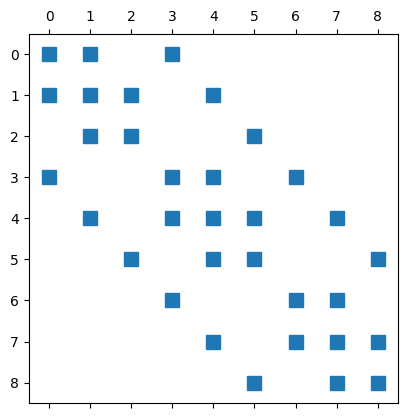

In [53]:
import scipy.sparse as sparse
n = 3
epsilon = 1e-1

def not_eff(n,epsilon):
    A = sparse.lil_matrix((n*n, n*n))

    for row in range(n):
        for col in range(n):
            A[row*n+col,row*n+col] += 1
            if row != n-1:
                A[row*n+col,row*n+col+n] = -epsilon
                A[row*n+col,row*n+col] += epsilon
            if col != n-1:
                A[row*n+col,row*n+col+1] = -epsilon
                A[row*n+col,row*n+col] += epsilon
            if row != 0:
                A[row*n+col,row*n+col-n] = -epsilon
                A[row*n+col,row*n+col] += epsilon
            if col != 0:
                A[row*n+col,row*n+col-1] = -epsilon
                A[row*n+col,row*n+col] += epsilon
    return A      
A = not_eff(3,0.1)
plt.spy(A)

In [54]:
print(A.todense())

[[ 1.2 -0.1  0.  -0.1  0.   0.   0.   0.   0. ]
 [-0.1  1.3 -0.1  0.  -0.1  0.   0.   0.   0. ]
 [ 0.  -0.1  1.2  0.   0.  -0.1  0.   0.   0. ]
 [-0.1  0.   0.   1.3 -0.1  0.  -0.1  0.   0. ]
 [ 0.  -0.1  0.  -0.1  1.4 -0.1  0.  -0.1  0. ]
 [ 0.   0.  -0.1  0.  -0.1  1.3  0.   0.  -0.1]
 [ 0.   0.   0.  -0.1  0.   0.   1.2 -0.1  0. ]
 [ 0.   0.   0.   0.  -0.1  0.  -0.1  1.3 -0.1]
 [ 0.   0.   0.   0.   0.  -0.1  0.  -0.1  1.2]]


3. sestavte matici $A$ z předchozího úkolu bez použití cyklů. Sestavte nejprve vektory indexů řádků, sloupců a hodnot pro všechny nenulové prvky matice. Poté sestavte sparse matici ve formátu CSR najednou z těchto tří polí. Hint, jak na to: 
    - Sestavte tři pole: `row`, `col` a `data`, které obsahují řádky, sloupce a hodnoty nenulových prvků matice 
        - separátně sestavte příspěvky které vzniknou konektivitou na vnitřních horizontálních hranách a na vnitřních vertikálních hranách.
            - při procházení všech vnitřních horizontálních hran si rozmyslete jaké jsou vždy indexy nad a pod hranou (toto jsou souřadnice řádků a sloupců nenulových prvků)
            - totéž pro vnitřní vertikální hrany zde se může hodit `np.arange(n * n).reshape((n, n)).T.flatten()` což vytvoří vektor s přeházenými indexy (tedy indexy buněk uspořádané po sloupcích)
        - zvlášť sestavte příspevky pro mimodiagonální prvky a diagonální prvky.
            - u diagonálních prvků, nejprve vyrobte vektor hodnot $1+ 4\cdot \varepsilon$ a pak pro každou hranu odečtěte $\varepsilon$.
    - Tyto pole vytvořte vektorizovaně - bez cyklů

In [5]:
n =3
epsilon = -0.1

def A_efficiently(n:int, epsilon):
    #stands for side diagonals
    upper_diag_r = np.arange(n*n-n)
    upper_diag_c = np.arange(n,n*n)
    lower_diag_r = np.arange(n,n*n)
    lower_diag_c = np.arange(n*n-n)
    #stands for higher or lower part of main diag
    upper_main_diag_c = np.arange(1,n*n)
    upper_main_diag_r = np.arange(n*n-1)
    
    upper_main_diag_c =np.delete(upper_main_diag_c,np.arange(n-1,n*n-1,n))
    upper_main_diag_r = np.delete(upper_main_diag_r,np.arange(n-1,n*n-1,n))
    
    lower_main_diag_r = np.arange(1,n*n)
    lower_main_diag_c = np.arange(n*n-1)

    lower_main_diag_r = np.delete(lower_main_diag_r,np.arange(n-1,n*n-1,n))
    lower_main_diag_c = np.delete(lower_main_diag_c,np.arange(n-1,n*n-1,n))
    
    data_side =  -np.ones(4*(n*n-n))*epsilon
    
    diagonal_idx = np.arange(n * n)
    row_idx_diag = diagonal_idx
    col_idx_diag = diagonal_idx
    
    data_diag = (1 + 4 * epsilon) * np.ones(n * n)

    data_diag[::n] -= epsilon
    data_diag[n-1::n] -= epsilon
    data_diag[:n] -= epsilon
    data_diag[-n:] -= epsilon
    
    row=np.hstack((row_idx_diag,upper_diag_r,lower_diag_r,upper_main_diag_r,lower_main_diag_r))
    col=np.hstack((col_idx_diag,upper_diag_c,lower_diag_c,upper_main_diag_c,lower_main_diag_c))
    data = np.hstack((data_diag,data_side))
    
    A_efficiently = csr_matrix((data,(row,col)))
    return A_efficiently
    """
    print(upper_diag_r,upper_diag_c)
    print(lower_diag_r, lower_diag_c)
    print(upper_main_diag_r,upper_main_diag_c)
    print(lower_main_diag_r,lower_main_diag_c)
    print(len(data_diag))
    """

In [6]:
#bavil jsem se s jonasem ohledne reseni 3, kod tu sem davam s jeho svolenim pouze na nějaké menší porovnání rychlost, tento kod neni soucasti kodu odeslaného k hodnoceni
def A_efficiently_jonas_koziorek(n, eps):
    def generate(e, vals, id):
        e_n = [e + np.full(e.shape,i) for i in vals] # only 4 or 3 or 2 iterations
        cols = np.hstack((e,*e_n))
        rows = np.tile(e, len(e_n)+1)
        vals = np.hstack((np.full(e.shape, 1+id*eps), np.full(cols.size - e.size, -eps)))
        return rows, cols, vals

    # works for n >= 3
    if n >= 3:
        nums = np.arange(n**2)
        step = n - 2
        ne = nums[1:step+1] #north edge
        se = nums[-1-step:-1] #south edge
        we = nums[n:n**2-2*n+1:n] #west edge
        ee = nums[2*n-1:n**2-n+1:n] #east edge

        ne_rows, ne_cols, ne_vals = generate(ne, [1,-1,n], 3)
        se_rows, se_cols, se_vals = generate(se, [1,-1,-n], 3)
        we_rows, we_cols, we_vals = generate(we, [1,n,-n], 3)
        ee_rows, ee_cols, ee_vals = generate(ee, [-1,n,-n], 3)

        nwc_rows, nwc_cols, nwc_vals = generate(np.array([0]), [1,n],2) # north west corner
        nec_rows, nec_cols, nec_vals = generate(np.array([n-1]),[-1,n],2) # north east corner
        swc_rows, swc_cols, swc_vals = generate(np.array([n**2-n]),[1,-n],2) # north west corner
        sec_rows, sec_cols, sec_vals = generate(np.array([n**2-1]),[-1,-n],2) # north east corner

        mid = np.arange(n**2).reshape(n,n)[1:-1,1:-1].flatten() # not very good solution
        mid_rows, mid_cols, mid_vals = generate(mid, [1,-1,n,-n], 4)

        row_idx_diag = np.hstack((ne_rows, se_rows, we_rows, ee_rows, nwc_rows, nec_rows, swc_rows, sec_rows, mid_rows))
        col_idx_diag = np.hstack((ne_cols, se_cols, we_cols, ee_cols, nwc_cols, nec_cols, swc_cols, sec_cols, mid_cols))
        data = np.hstack((ne_vals, se_vals, we_vals, ee_vals, nwc_vals, nec_vals, swc_vals, sec_vals, mid_vals))

        A_efficiently = sparse.csr_matrix((data, (row_idx_diag, col_idx_diag)), shape=(n**2, n**2))

        return A_efficiently

[[ 1.2 -0.1  0.  -0.1  0.   0.   0.   0.   0. ]
 [-0.1  1.3 -0.1  0.  -0.1  0.   0.   0.   0. ]
 [ 0.  -0.1  1.2  0.   0.  -0.1  0.   0.   0. ]
 [-0.1  0.   0.   1.3 -0.1  0.  -0.1  0.   0. ]
 [ 0.  -0.1  0.  -0.1  1.4 -0.1  0.  -0.1  0. ]
 [ 0.   0.  -0.1  0.  -0.1  1.3  0.   0.  -0.1]
 [ 0.   0.   0.  -0.1  0.   0.   1.2 -0.1  0. ]
 [ 0.   0.   0.   0.  -0.1  0.  -0.1  1.3 -0.1]
 [ 0.   0.   0.   0.   0.  -0.1  0.  -0.1  1.2]]


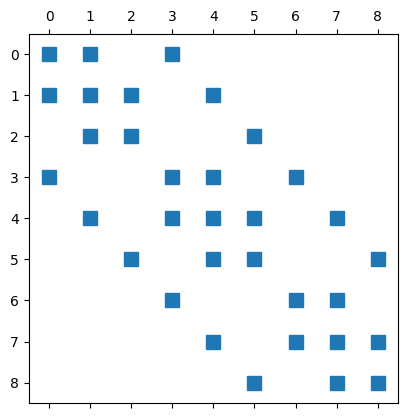

In [55]:
A = A_efficiently(3,0.1)
print(A.todense())
plt.spy(A)

In [8]:
%%timeit
a = not_eff(10,2)

1.81 ms ± 34.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [9]:
%%timeit
a = A_efficiently(10,2)

223 µs ± 2.02 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [10]:
%%timeit
a = A_efficiently_jonas_koziorek(10,2)

378 µs ± 7.38 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Hehe, I won :)

In [11]:
A_not_eff = not_eff(10,-0.1)
A_eff = A_efficiently(10,-0.1)
#print(A_not_eff.todense())
#print(A_eff.todense())
print(np.abs(A_eff.todense()-A_not_eff.todense())<0.01) # porovnani floatu je zaludne, dat tam ciste ==, tak to neprojde :D
np.array(np.abs(A_eff.todense()-A_not_eff.todense())<0.01).sum() 

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


10000

4. Použijte matici $A$ z předchozích úkolů. Vytvořte (použijte níže vytvořený) vektor $b$ odpovídající čtvercové síti s nulami všude kromě malého čtverce uprostřed ($n/6$ okolo středu) s hodnotou 1. 
    - Vykreslete řešení $x$ systému $A \cdot x = b$ jako obrázek čtvercové sítě
    - Spočtěte a vizualizujte 3 vlastní vektory matice $A$ (vlastní vektory odpovídající největším vlastním hodnotám) - opět jako obrázek čtvercové sítě

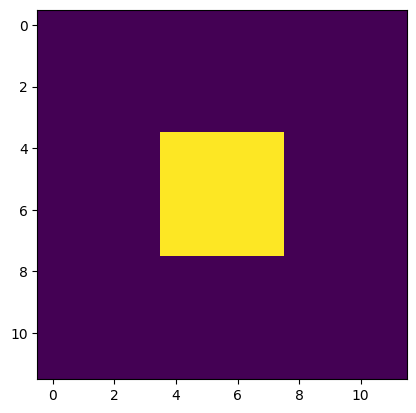

In [12]:
import matplotlib.pyplot as plt

n = 12
epsilon = 2e-1
A = A_efficiently(n, epsilon)
b = np.zeros((n, n))

b[n//2 - n//6:n//2 + n//6,n//2 - n//6:n//2 + n//6] = 1
b = b.flatten()
plt.imshow(b.reshape((n, n)))

In [13]:
import scipy as sp

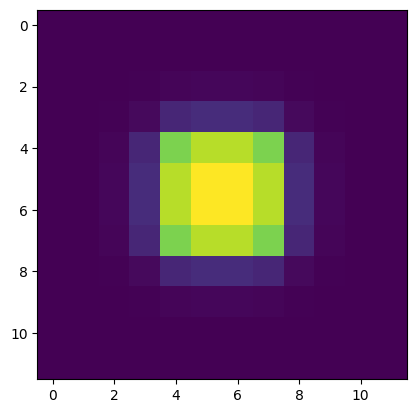

In [14]:

# TODO - vyřešte lineární rovnici A x = b a vykreselete výsledek
plt.imshow(sp.sparse.linalg.spsolve(A,b).reshape(n,n))

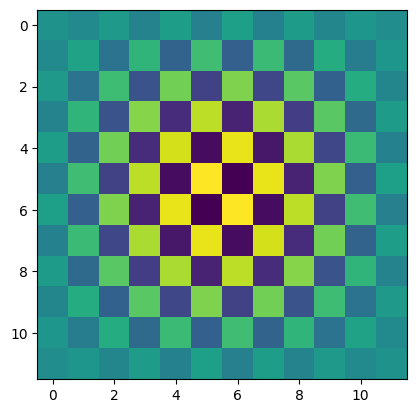

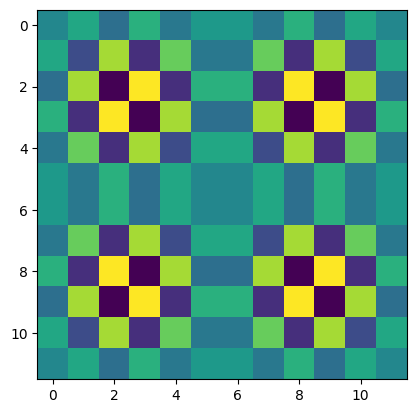

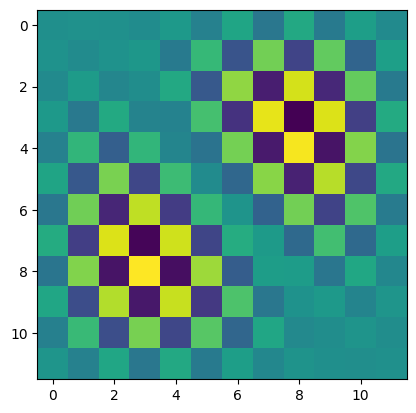

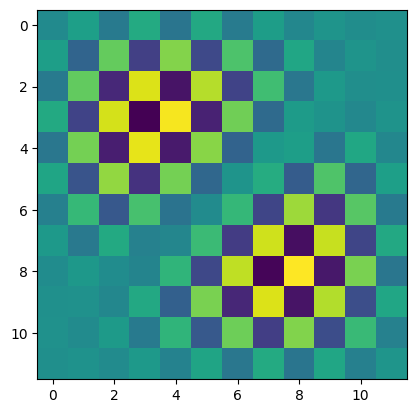

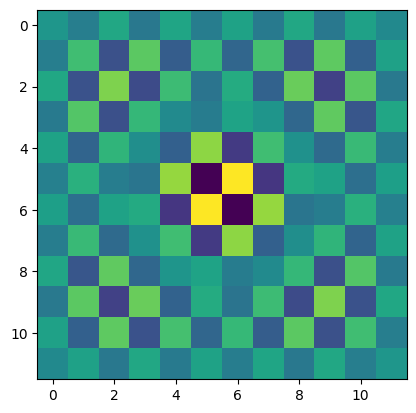

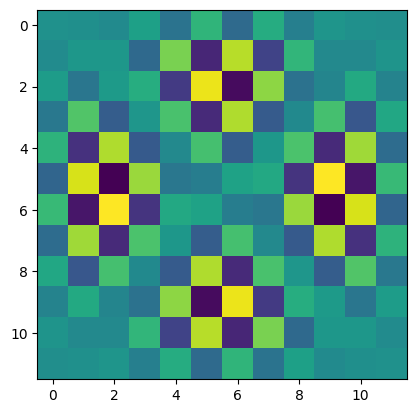

In [38]:
import scipy as sp
# TODO - spočtěte a vykreslete vlastní vektory matice A
#plt.imshow()

#plt.plot(sp.sparse.linalg.eigs(A)[1][0,2,3])
eig = sp.sparse.linalg.eigs(A)
plt.figure()
eg =eig[1][:,0]
plt.imshow(eg.reshape(n,n).real)
plt.figure()
eg =eig[1][:,1]
plt.imshow(eg.reshape(n,n).real)
plt.figure()
eg =eig[1][:,2]
plt.imshow(eg.reshape(n,n).real)
plt.figure()
eg =eig[1][:,3]
plt.imshow(eg.reshape(n,n).real)
plt.figure()
eg =eig[1][:,4]
plt.imshow(eg.reshape(n,n).real)
plt.figure()
eg =eig[1][:,5]
plt.imshow(eg.reshape(n,n).real)

#vim, ze by to bylo lepsi loopem, ale hazelo mi to par erroru, tak jsem to chtel mit z krku rychleji

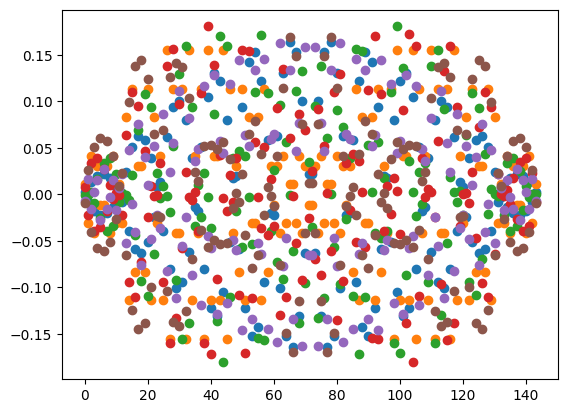

In [ ]:
plt.plot(eig, "o")

5. Nalezněte všechny kořeny Legendrova polynomu stupně 5 na intervalu $<-1,1>$

In [43]:
import scipy as sp
b = np.roots(sps.legendre(5))
print(b)

[-0.90617985 -0.53846931  0.90617985  0.53846931  0.        ]


6. Pomocí SymPy nalezněte všechny kořeny Legendrova polynomu stupně 5. Použíjte `sympy.legendre()` pro vytvoření výrazu odpovídajícímu Legendrovu polynomu.
- porovnejte výsledky s předchozím úkolem

In [44]:
import sympy as sp

x = sp.Symbol('x')
legendre_5 = sp.legendre(5, x)
a = sp.solvers.solve(legendre_5,x)
c = sp.roots(legendre_5)
print(c)

{-sqrt(5/9 - 2*sqrt(70)/63): 1, sqrt(5/9 - 2*sqrt(70)/63): 1, -sqrt(2*sqrt(70)/63 + 5/9): 1, sqrt(2*sqrt(70)/63 + 5/9): 1, 0: 1}


In [50]:
for k in c:
    print(k.evalf())
for v in b:
    print(v)

-0.538469310105683
0.538469310105683
-0.906179845938664
0.906179845938664
0
-0.9061798459386643
-0.5384693101056833
0.9061798459386635
0.5384693101056831
0.0
